In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pip install ucimlrepo

Loading Data

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
#X['Target'] = y


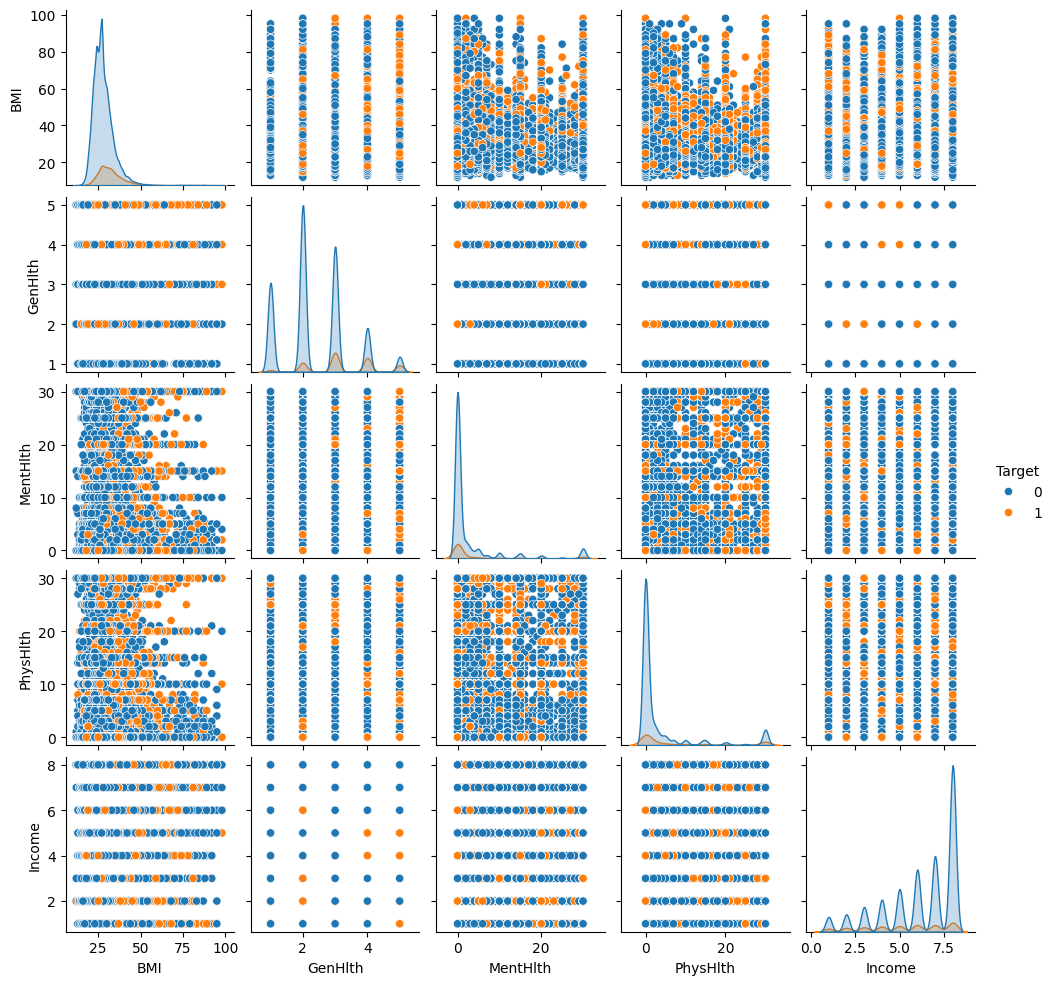

In [ ]:
sns.pairplot(X[['BMI','GenHlth','MentHlth','PhysHlth','Income','Target']],
             hue='Target', height=2)

In [ ]:
X['Target'].value_counts()

Target
0    218334
1     35346
Name: count, dtype: int64

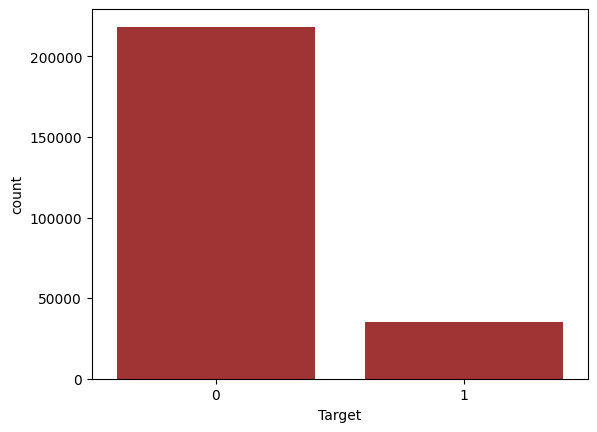

In [ ]:
sns.countplot(x='Target', data=X,color= 'firebrick' )
plt.show()

In [3]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=55)

In [ ]:
X = X.drop(columns=["Target"])

In [4]:
X_res, y_res = ros.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_res, y_res  = smote.fit_resample(X, y)

In [ ]:
y_res.value_counts()

Diabetes_binary
0                  218334
1                  218334
Name: count, dtype: int64

In [ ]:
X_res=X
y_res=y

###Data Analysis

Checking Null values

In [ ]:
cdc_diabetes_health_indicators.variables[['name','description','missing_values']]

,name,description,missing_values
0,ID,Patient ID,no
1,Diabetes_binary,0 = no diabetes 1 = prediabetes or diabetes,no
2,HighBP,0 = no high BP 1 = high BP,no
3,HighChol,0 = no high cholesterol 1 = high cholesterol,no
4,CholCheck,0 = no cholesterol check in 5 years 1 = yes ch...,no
5,BMI,Body Mass Index,no
6,Smoker,Have you smoked at least 100 cigarettes in you...,no
7,Stroke,(Ever told) you had a stroke. 0 = no 1 = yes,no
8,HeartDiseaseorAttack,coronary heart disease (CHD) or myocardial inf...,no
9,PhysActivity,physical activity in past 30 days - not includ...,no


Features scaling

In [5]:
X_res.describe().loc[['min','max']]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
min,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
max,1.0,1.0,1.0,98.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0


In [6]:
from sklearn.preprocessing import MinMaxScaler


scalar = MinMaxScaler((0,1))
#converting the non scaled data
X_res = pd.DataFrame(scalar.fit_transform(X_res),columns=X_res.columns)
X = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.1,random_state=55)

Checking outlyers

<Axes: >

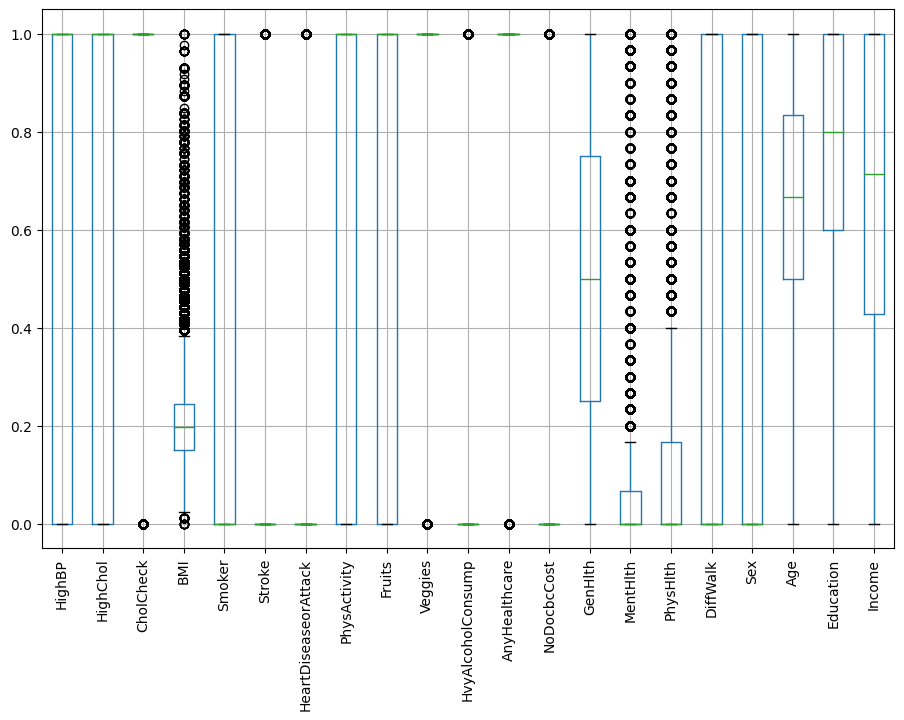

In [9]:
X_train.boxplot(figsize=(11,7),rot=90)

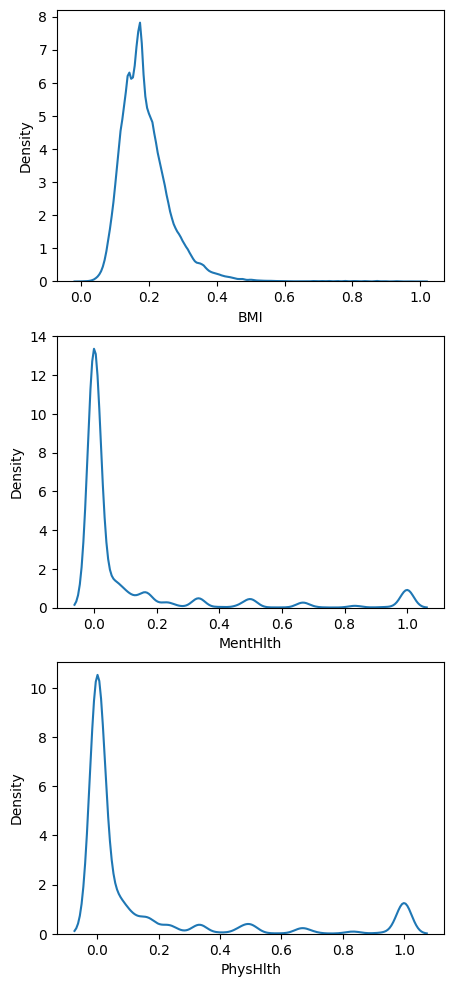

In [ ]:
fig, axs = plt.subplots(3,figsize=(5,12))
sns.kdeplot(X_train, ax=axs[0], x="BMI")
sns.kdeplot(X_train, ax=axs[1], x="MentHlth")
sns.kdeplot(X_train,ax=axs[2],x="PhysHlth")
plt.show()

###IQR Based Filtering


source:https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff

In [ ]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [ ]:
def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False
def replace_with_thresholds_iqr(dataframe, th1=0.05, th3=0.95,replace=False):
    outlayers = pd.DataFrame(columns=['columns','count'])
    for col_name in dataframe.columns:
        lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name, th1, th3)
        if check_outliers_iqr(dataframe,col_name):
          outlayers.loc[len(outlayers.index)]=[col_name,sum((dataframe[col_name].values > upper_limit) | (dataframe[col_name].values < lower_limit))]
          if replace:
            if lower_limit < 0:
                # We don't want to replace with negative values
                dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            else:
                dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
    return outlayers

In [ ]:
replace_with_thresholds_iqr(X_train,th1=0.25,th3=0.75)

,columns,count
0,CholCheck,8502
1,BMI,8885
2,Stroke,9267
3,HeartDiseaseorAttack,21510
4,PhysActivity,55703
5,Veggies,43028
6,HvyAlcoholConsump,12840
7,AnyHealthcare,11195
8,NoDocbcCost,19233
9,GenHlth,10900


##Feature Selection
###Forward Feature Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

lr =LogisticRegression(random_state=55, n_jobs =-1)
lr.fit(X_train, y_train.to_numpy().ravel())

ffs = SequentialFeatureSelector(lr, k_features ='best', forward = True, n_jobs=-1)
ffs.fit(X_train, y_train.to_numpy().ravel())

ffs.k_feature_names_

('HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'Education',
 'Income')

#Random Forest Importance

<Axes: xlabel='Features'>

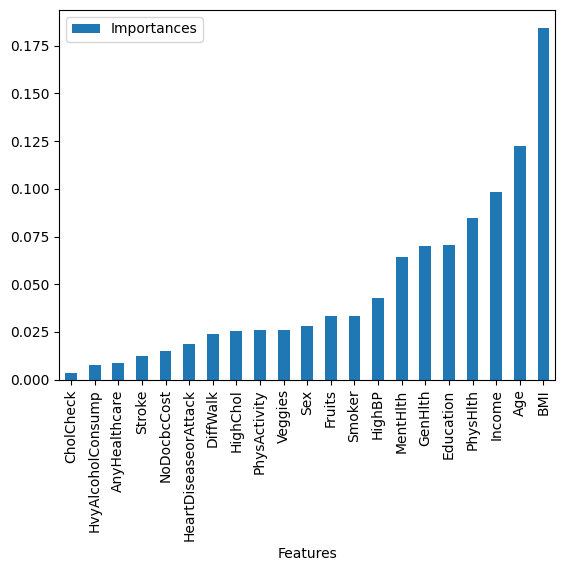

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(X_train, y_train.to_numpy().ravel())

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(X_train).columns, "Importances": importances})
final_df.set_index('Importances')

final_df =final_df.sort_values('Importances')
final_df.plot.bar(x='Features')

###ANOVA f-test Feature Selection

<Axes: xlabel='Features'>

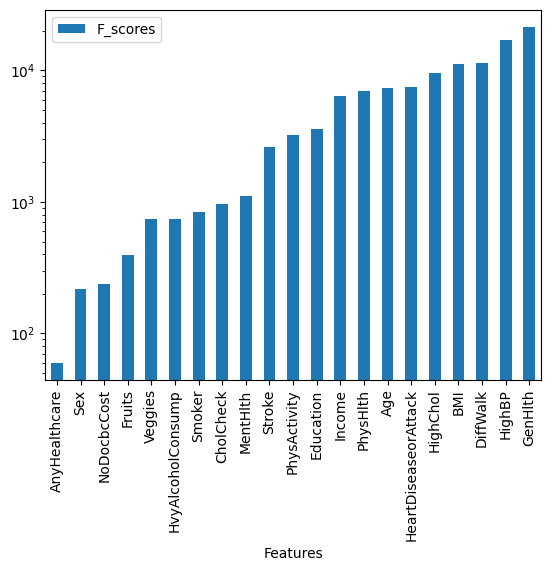

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train.to_numpy().ravel())

final_df = pd.DataFrame({"Features": pd.DataFrame(X_train).columns, "F_scores": fs.scores_}).fillna(0)
final_df =final_df.sort_values('F_scores')
final_df.plot.bar(x='Features',logy=True)

##Correlation between Columns


<Axes: >

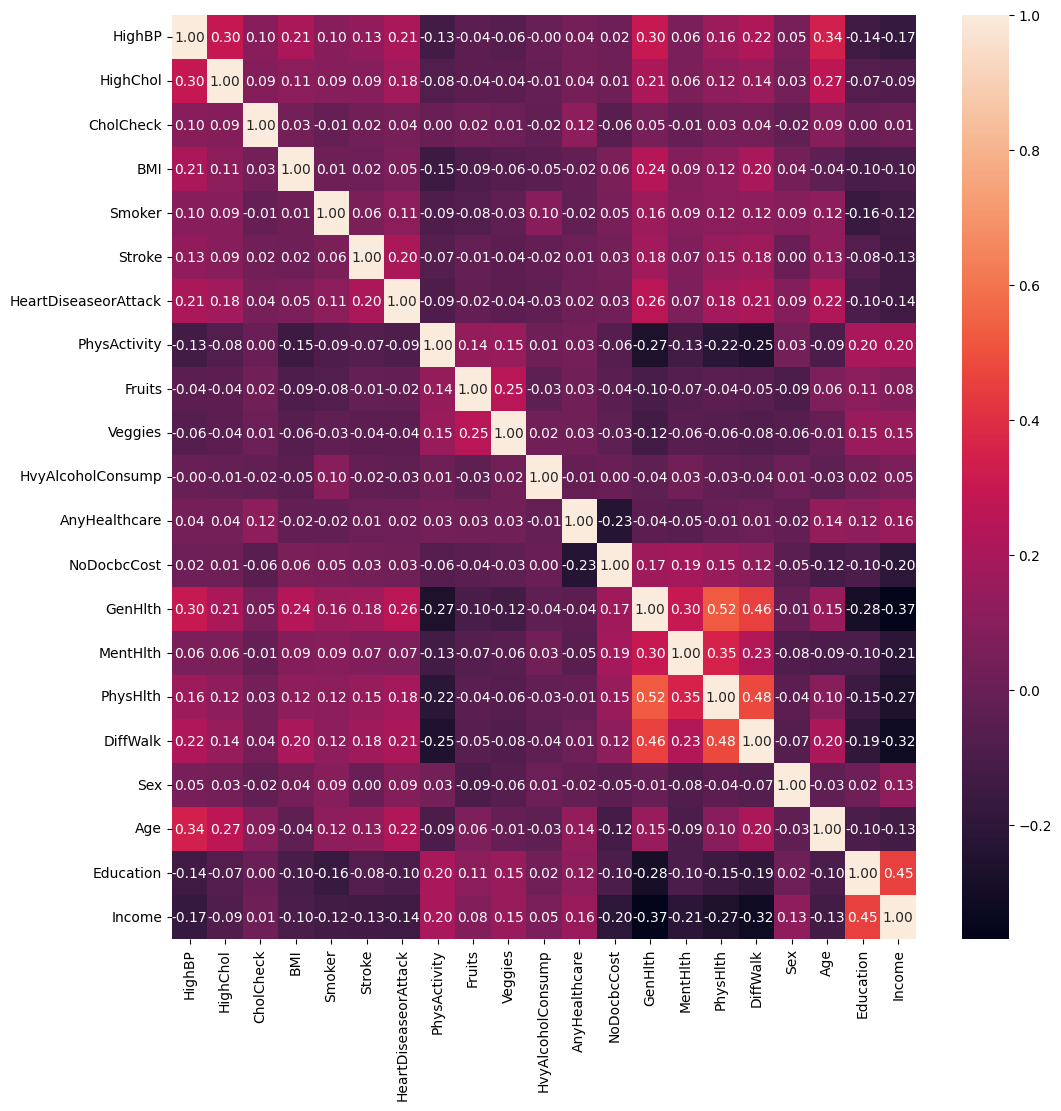

In [ ]:
cor = X_train.corr()
plt.figure(figsize = (12,12))
sns.heatmap(cor, annot = True,fmt=".2f")

##PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
cumsum=np.cumsum(explained_variance)
no_dim = np.argmax(cumsum >= 0.95)+1#required number of dimenctions to represent data
print('No of PCA components required to represent 95% of data:',no_dim)

No of PCA components required to represent 95% of data: 17


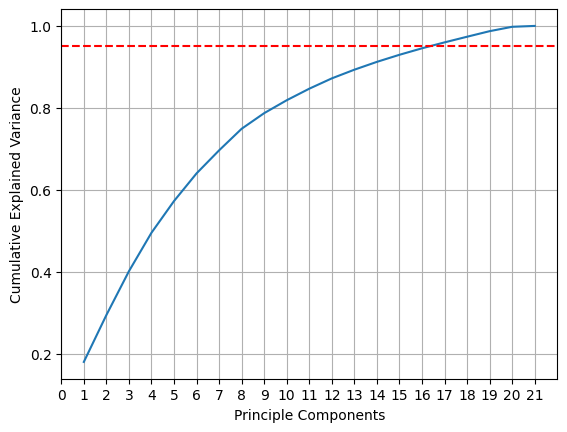

In [ ]:
plt.plot(range(1,22),cumsum)
plt.axhline(y = 0.95, color = 'r', linestyle = 'dashed')
plt.xlabel("Principle Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(22))
plt.grid()
plt.show()

In [8]:
X_valid_train,X_valid_test,y_valid_train,y_valid_test = train_test_split(X_train.drop(columns=['Education','DiffWalk','PhysHlth']),y_train,test_size=0.1,random_state=55)

In [ ]:
pca = PCA(n_components=16)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca_train,X_valid_pca_test,y_valid_pca_train,y_valid_pca_test = train_test_split(X_train_pca,y_train,test_size=0.1,random_state=55)

##KNN

Minimum error: 0.13949719691660828 at K = 10
Accuracy of KNN for K min : 86.05028030833918


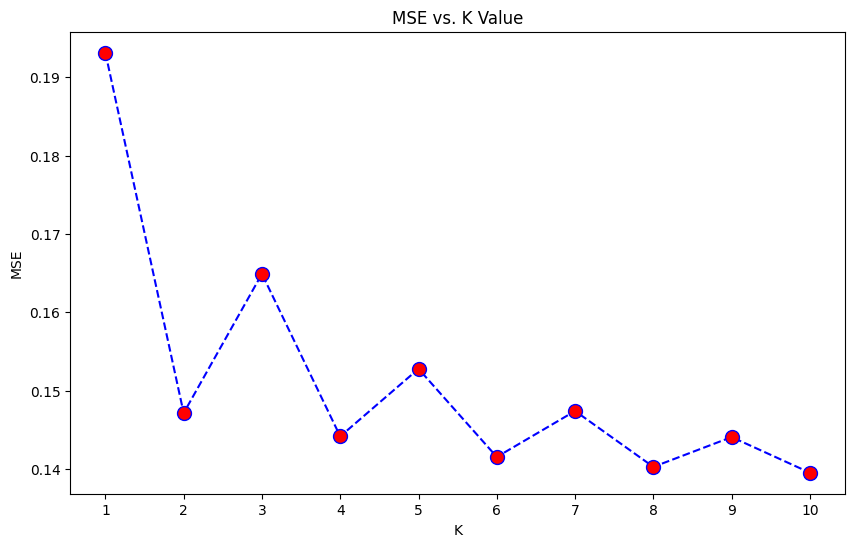

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
mse = []
list_k = list(range(1, 11))
#Calculating MSE for K neighbours
for k in list_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_valid_train,y_valid_train.values.ravel())
    knn_labels = knn.predict(X_valid_test)
    mse.append(mean_squared_error(y_valid_test,knn_labels))

plt.figure(figsize=(10,6))
plt.plot(list_k,mse,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. K Value')
plt.xticks(range(1, 11))
plt.xlabel('K')
plt.ylabel('MSE')
print("Minimum error:",min(mse),"at K =",mse.index(min(mse))+1)
knn = KNeighborsClassifier(n_neighbors=mse.index(min(mse))+1)
knn.fit(X_valid_train,y_valid_train.values.ravel())
acc= knn.score(X_valid_test,y_valid_test)
print('Accuracy of KNN for K min :',acc*100)


#KNN with PCA

Minimum error: 0.14168710581639804 at K = 10
Accuracy of KNN with PCA: 85.8312894183602


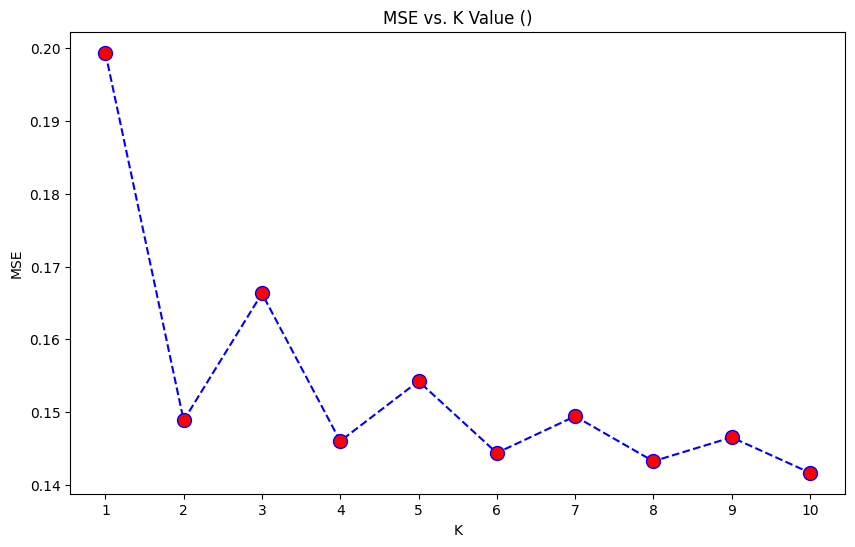

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
mse = []
list_k = list(range(1, 11))
#Calculating MSE for K neighbours
for k in list_k:
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_valid_pca_train,y_valid_pca_train.values.ravel())
    knn_labels = knn_pca.predict(X_valid_pca_test)
    mse.append(mean_squared_error(y_valid_pca_test,knn_labels))

plt.figure(figsize=(10,6))
plt.plot(list_k,mse,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. K Value ()')
plt.xticks(range(1, 11))
plt.xlabel('K')
plt.ylabel('MSE')
print("Minimum error:",min(mse),"at K =",mse.index(min(mse))+1)
knn_pca = KNeighborsClassifier(n_neighbors=mse.index(min(mse))+1)
knn_pca.fit(X_valid_pca_train,y_valid_pca_train.values.ravel())
acc= knn_pca.score(X_valid_pca_test,y_valid_pca_test)
print('Accuracy of KNN with PCA:',acc*100)

##SVM

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X.drop(columns=['Education','DiffWalk','PhysHlth']),y,test_size=0.1,random_state=55)

In [ ]:
from sklearn.svm import SVC
SVC_ = SVC(gamma = 'auto', shrinking = False,kernel='poly',class_weight='balanced')
SVC_.fit(X_train,y_train.values.ravel())
acc= SVC_.score(X_test,y_test)
print('Accuracy of SVM:',acc*100)

##Random Forest


In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(X_valid_train,y_valid_train.values.ravel())
acc= model.score(X_valid_test,y_valid_test)
print('Accuracy',acc*100)

Accuracy 92.95946668023714


Text(33.22222222222222, 0.5, 'Predicted label')

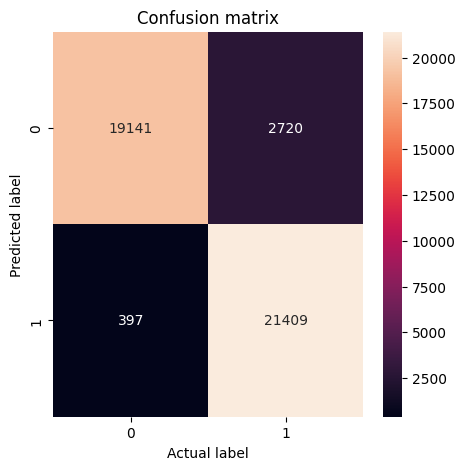

In [10]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test.drop(columns=['Education','DiffWalk','PhysHlth']))
threshold=0.5
cm = confusion_matrix(y_test, predictions > threshold)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92     21861
           1       0.89      0.98      0.93     21806

    accuracy                           0.93     43667
   macro avg       0.93      0.93      0.93     43667
weighted avg       0.93      0.93      0.93     43667



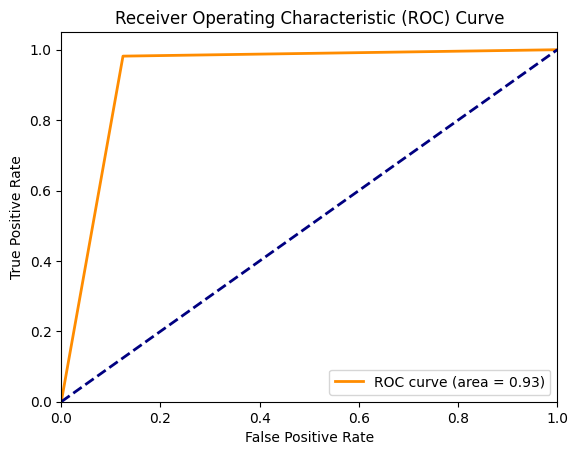

In [12]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()